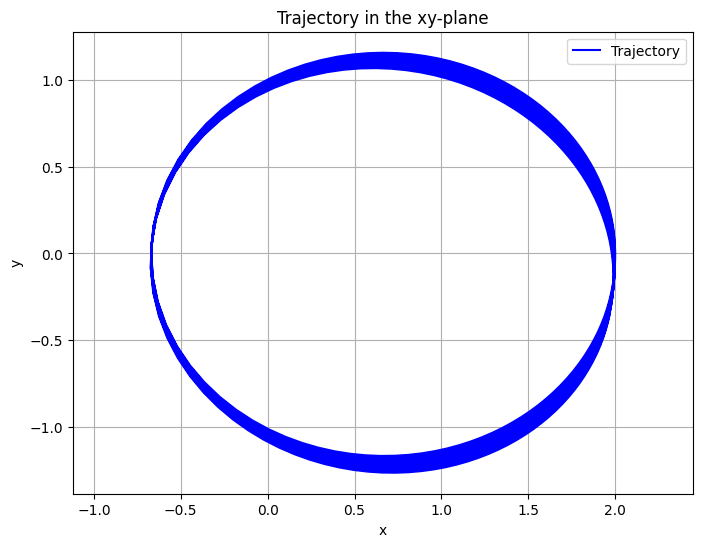

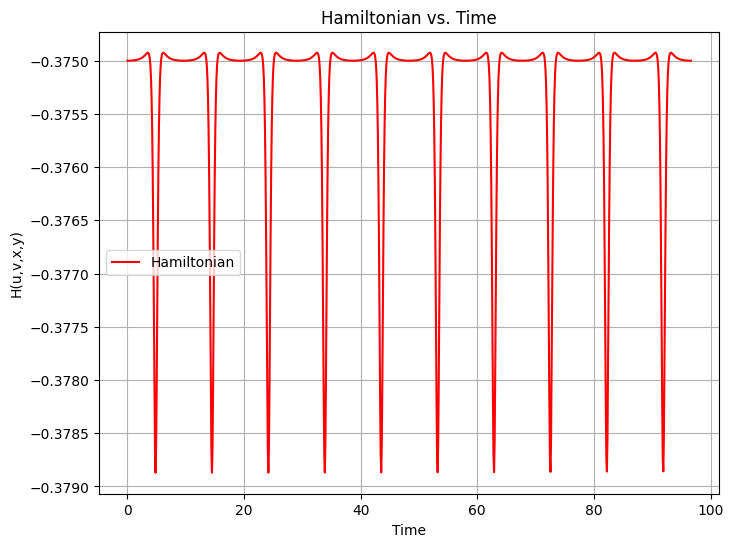

In [11]:
#Problem 1d

import numpy as np
import matplotlib.pyplot as plt

def stoermer_verlet(u0, v0, x0, y0, h, N):
    t = np.zeros(N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    u = np.zeros(N+1)
    v = np.zeros(N+1)
    x[0], y[0] = x0, y0
    u[0], v[0] = u0, v0

    for n in range(N):
        r = np.sqrt(x[n]**2 + y[n]**2)
        u_half = u[n] + 0.5 * h * (- x[n] / (r**3))
        v_half = v[n] + 0.5 * h * (- y[n] / (r**3))
        x[n+1] = x[n] + h * u_half
        y[n+1] = y[n] + h * v_half
        r_new = np.sqrt(x[n+1]**2 + y[n+1]**2)
        u[n+1] = u_half + 0.5 * h * (- x[n+1] / (r_new**3))
        v[n+1] = v_half + 0.5 * h * (- y[n+1] / (r_new**3))
        t[n+1] = t[n] + h
    return t, x, y, u, v

u0 = 0.0
v0 = 0.5
x0 = 2.0
y0 = 0.0

a = 4.0 / 3.0
e = 0.5
T = 2 * np.pi * (a**1.5)

h = 0.01 * T
T_total = 10 * T
N = int(T_total / h)

t, x, y, u, v = stoermer_verlet(u0, v0, x0, y0, h, N)

r = np.sqrt(x**2 + y**2)
H = 0.5 * (u**2 + v**2) - 1.0 / r

plt.figure(figsize=(8,6))
plt.plot(x, y, 'b-', label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory in the xy-plane')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(t, H, 'r-', label='Hamiltonian')
plt.xlabel('Time')
plt.ylabel('H(u,v,x,y)')
plt.title('Hamiltonian vs. Time')
plt.grid(True)
plt.legend()
plt.show()


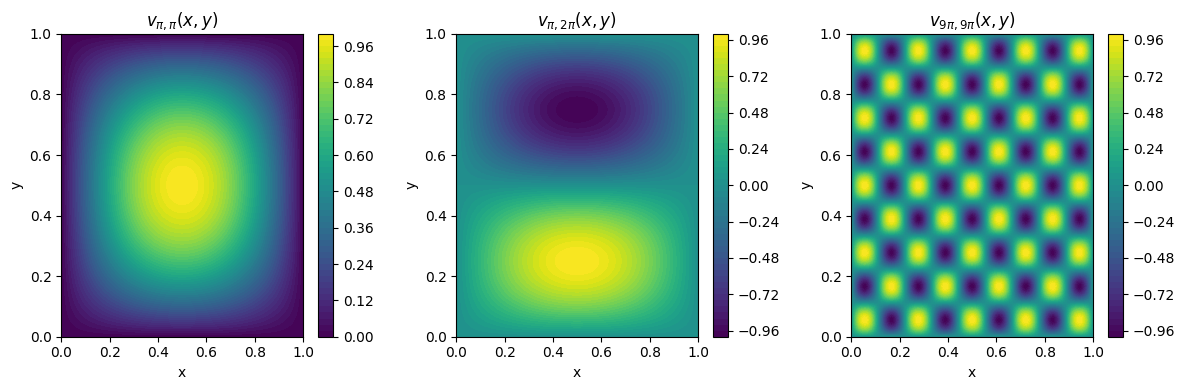

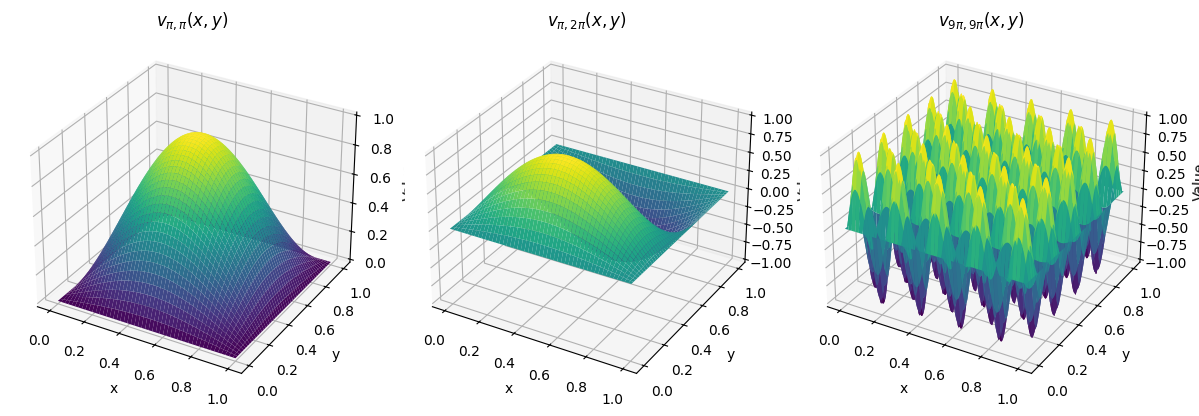

In [12]:
#Problem 2b
from mpl_toolkits.mplot3d import Axes3D

J = 10
h = 1.0 / J

x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

def eigenfunction(x, y, kx, ky):
    return np.sin(kx * x) * np.sin(ky * y)

kx1, ky1 = np.pi, np.pi
kx2, ky2 = np.pi, 2*np.pi
kx3, ky3 = (J-1)*np.pi, (J-1)*np.pi

v1 = eigenfunction(X, Y, kx1, ky1)
v2 = eigenfunction(X, Y, kx2, ky2)
v3 = eigenfunction(X, Y, kx3, ky3)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
contour1 = plt.contourf(X, Y, v1, levels=50, cmap='viridis')
plt.title(r'$v_{\pi,\pi}(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour1)

plt.subplot(1,3,2)
contour2 = plt.contourf(X, Y, v2, levels=50, cmap='viridis')
plt.title(r'$v_{\pi,2\pi}(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour2)

plt.subplot(1,3,3)
contour3 = plt.contourf(X, Y, v3, levels=50, cmap='viridis')
plt.title(r'$v_{9\pi,9\pi}(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour3)

plt.tight_layout()
plt.show()

kxs = [np.pi, np.pi, 9*np.pi]
kys = [np.pi, 2*np.pi, 9*np.pi]
titles = [r'$v_{\pi,\pi}(x,y)$', r'$v_{\pi,2\pi}(x,y)$', r'$v_{9\pi,9\pi}(x,y)$']

fig = plt.figure(figsize=(12,4))

for i in range(3):
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    Z = eigenfunction(X, Y, kxs[i], kys[i])
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Value')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

